# Random Forest 

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt

## Data Processing

In [5]:
descriptors = pd.read_csv('./descriptors.csv', delimiter = ';')
descriptors = descriptors.drop(descriptors.columns[0],axis=1)
descriptors 

,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,52.0,29.0,35.333332,11.111111,23.0,46.0,90.0,44.0,70.000000,16.000000,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,148.33333,56.222220,64.0
1,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
3,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,5.000000,...,0.0,0.0,0.0,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0
4,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2527,56.0,25.0,40.666668,10.222222,31.0,9.0,95.0,86.0,59.333332,33.555557,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,119.00000,73.333336,64.0
2528,31.0,16.0,23.000000,8.000000,15.0,74.0,83.0,9.0,78.500000,4.500000,...,0.0,0.0,0.0,0.0,2.0,64.0,62.0,33.00000,31.000000,2.0
2529,33.0,2.0,32.000000,1.000000,31.0,74.0,84.0,10.0,79.000000,5.000000,...,0.0,0.0,0.0,0.0,64.0,166.0,102.0,115.00000,51.000000,64.0


In [23]:
dataset = pd.read_csv('data.csv', delimiter = ',')
band_gaps = dataset["band_gap_vals"]
band_gaps

0       0.088699
1       1.447379
2       1.496388
3       0.544622
4       1.440079
          ...   
2526    1.653516
2527    0.000000
2528    1.232222
2529    0.302066
2530    1.231642
Name: band_gap_vals, Length: 2531, dtype: float64

In [24]:
# set the X and y training data

X = descriptors
y = band_gaps

In [25]:
# here the data is scaled 
scaler = StandardScaler()      
X_sd = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_sd, columns = X.columns)

In [26]:
X_scaled

,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,1.338310,1.005707,1.035976,0.813912,0.189217,-1.073801,1.601002,1.409791,-0.640714,1.172518,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,1.512022,1.563537,1.420450,0.782946,0.489238
1,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
2,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
3,-0.271002,-1.066068,0.585156,-1.218941,1.005247,0.398230,0.099562,-0.377217,0.364244,-0.339448,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,0.538894,0.087007,0.720776,0.428748,0.489238
4,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
2527,1.677112,0.698777,1.757288,0.635200,1.005247,-3.018984,2.852202,3.617271,-1.831776,3.585553,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,1.512022,1.563537,0.804737,1.943510,0.489238
2528,-0.440403,0.008186,-0.632058,0.188419,-0.626813,0.398230,-0.150678,-0.429776,0.308413,-0.408173,...,-0.132827,-0.125411,-0.131763,-0.052039,-1.009707,-1.036648,-0.850473,-1.000423,-0.927754,-0.789041
2529,-0.271002,-1.066068,0.585156,-1.218941,1.005247,0.398230,0.099562,-0.377217,0.364244,-0.339448,...,-0.132827,-0.125411,-0.131763,-0.052039,1.021199,0.538894,0.087007,0.720776,0.428748,0.489238


## Training

In [27]:
#train test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, random_state=42)

In [28]:
model = RandomForestRegressor(n_estimators=100, 
                              random_state=42)

# Fit on training data
model.fit(X1_train, y1_train)

RandomForestRegressor(random_state=42)

In [29]:
# fit the random forest model
y1_pred = model.predict(X1_test)


# Plot model 

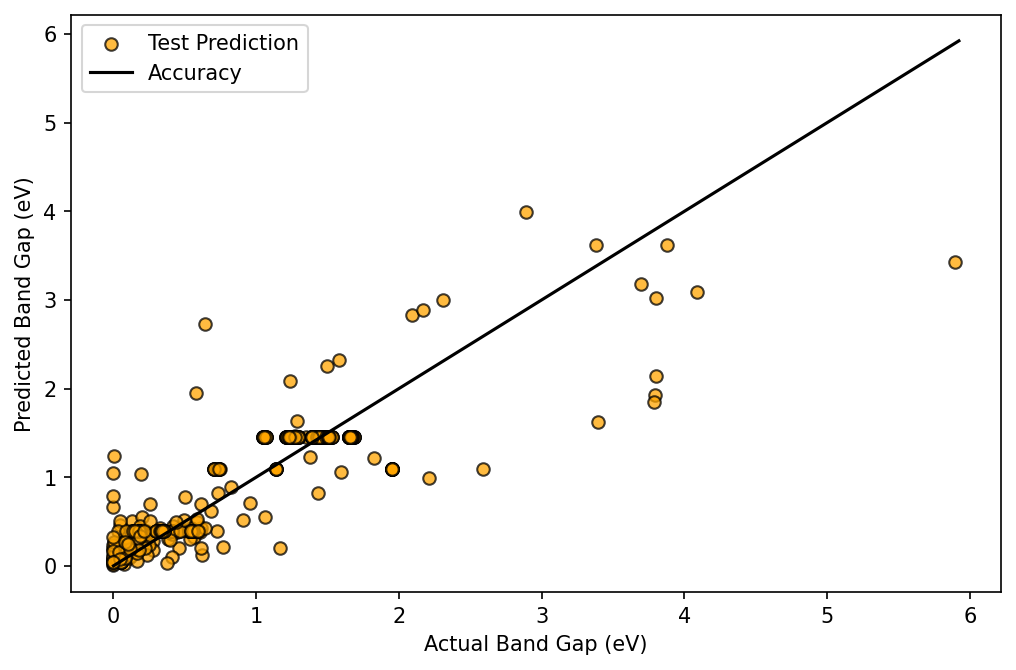

In [26]:
fig, ax = plt.subplots(figsize=[8, 5], dpi=150)
acc = np.linspace(0, np.max(np.concatenate([y1_train, tr_preds, y1_test, te_preds])), 1000)
ax.scatter(y1_test, y1_pred, color='orange', edgecolor='k', alpha=0.75, label='Test Prediction')
ax.plot(acc, acc, label='Accuracy', color='black')
ax.set_xlabel('Actual Band Gap (eV)')
ax.set_ylabel('Predicted Band Gap (eV)')
plt.legend()

# Test

In [27]:
MAE = mean_absolute_error(y1_pred,y1_test)
MSE = mean_squared_error(y1_pred,y1_test)
RMSE = np.sqrt(MSE)

In [28]:
print(MAE)
print(MSE)
print(RMSE)

0.19763811832530778
0.10758381267872887
0.3279997144491575


In [29]:
y_pred = model.predict(X1_test)
accuracy = model.score(X1_test, y1_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7923319211720232


In [40]:
# 5-fold cross validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.04


# Feature importance 

# Find best hyperparameters using grid search

In [98]:
#create random forest classifier
clf_rf = RandomForestClassifier()

#grid search for the best hyperparameters
rf_hyperparams_bay = {'n_estimators': [10, 50, 1000], 'max_depth': [2, 50, 100]}
grid_search = GridSearchCV(model, rf_hyperparams_bay, cv=5, return_train_score=True)
grid_search.fit(X1_train, y1_train)


#print the best parameters and score from grid search
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 50, 'n_estimators': 1000}
Best score:  0.7749801048963245


# Train model using grid search hyperparameters

In [29]:
best_params = {'max_depth': 50, 'n_estimators': 1000}

# create random forest classifier
rf = RandomForestRegressor(**best_params)

#train model with training data
rf.fit(X1_train, y1_train)

#evaluate the model with  test data
score = rf.score(X1_test, y1_test)
print("Test score: ", score)

Test score:  0.791908010969348


# Find the best hyperparameters using random search

In [18]:
# define parameter grid for random search
param_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

# create random forest model
rf = RandomForestRegressor()

# create randomized search object
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, 
    scoring='neg_mean_absolute_error', n_jobs=-1)

# fit randomized search object to the data
random_search.fit(X1_train, y1_train)

# print best hyperparameters from random search
print(random_search.best_params_)


{'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 12}


# Train model using random search hyperparameters

In [28]:
#using best parameters from random search
best_params = {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 12}

# create random forest classifier that will be trained with best hyperparameters from random search
rf = RandomForestRegressor(**best_params)

# train the model with training data
rf.fit(X1_train, y1_train)

# evaluate the model with test data
score = rf.score(X1_test, y1_test)
print("Test score: ", score)


Test score:  0.7902724028830903


# Find best hyperparameters using Bayesian Optimisation

In [34]:
# this takes a very long time to run which is why it has been commented out

# # define search space for the hyperparameters
# param_space = {
#     'n_estimators': (10, 1000),
#     'max_depth': (1, 50),
#     'min_samples_split': (2, 20)
# }

# # create random forest regressor
# rf = RandomForestRegressor(random_state=42)

# # create Bayesian optimization search object
# opt = BayesSearchCV(rf, param_space, n_iter=50)

# # fit search object to the data
# opt.fit(X1_train, y1_train)

# # print best hyperparameters from Bayesian optimisation
# print("Best hyperparameters: ", opt.best_params_)


E:\Anaconda 23-09-2022\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best hyperparameters:  OrderedDict([('max_depth', 14), ('min_samples_split', 5), ('n_estimators', 404)])


# Train model using Bayesian Optimisation hyperparameters

In [39]:
# #best hyperparameters from bayesian optimisation
# best_params = {'max_depth': 14, 'min_samples_split': 5, 'n_estimators': 404}

# # create random forest classifier using the best hyperparameters from Bayesian
# rf = RandomForestRegressor(**best_params)

# # train the model with the training data
# rf.fit(X1_train, y1_train)

# # evaluate the model with the test data
# score = rf.score(X1_test, y1_test)
# print("Test score: ", score)

Test score:  0.781711696925895


## Random Forest Trained on Top Descriptors from Lasso Regression (scaled)

In [30]:
X_top = X_scaled[["MagpieData mode Electronegativity", "MagpieData range Electronegativity", "MagpieData mean NfValence",
            "MagpieData mode MendeleevNumber", "MagpieData range NsValence"]]

X_top

,MagpieData mode Electronegativity,MagpieData range Electronegativity,MagpieData mean NfValence,MagpieData mode MendeleevNumber,MagpieData range NsValence
0,-0.504688,-0.234604,-0.23485,-1.391460,-0.33039
1,-0.116424,-0.430902,-0.23485,0.222002,-0.33039
2,-0.116424,-0.430902,-0.23485,0.222002,-0.33039
3,-0.116424,-0.452713,-0.23485,0.222002,-0.33039
4,-0.116424,-0.430902,-0.23485,0.222002,-0.33039
...,...,...,...,...,...
2526,-0.116424,-0.430902,-0.23485,0.222002,-0.33039
2527,-2.100882,3.255152,-0.23485,-3.523535,-0.33039
2528,-0.116424,-0.430902,-0.23485,0.222002,-0.33039
2529,-0.116424,-0.452713,-0.23485,0.222002,-0.33039


In [31]:
#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_top, y, random_state=42)

In [32]:
# use the obtained the best hyperparameters from the grid search
best_params = {'max_depth': 50, 'n_estimators': 1000}

# create random forest classifier
rf = RandomForestRegressor(**best_params)

#train model with training data
rf.fit(X2_train, y2_train)

#evaluate the model with  test data
score = rf.score(X2_test, y2_test)
print("Test score: ", score)

Test score:  0.7640725413927809


In [33]:
# 5-fold cross validation
scores = cross_val_score(rf, X_top, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.03


In [45]:
y2_pred = rf.predict(X2_test)

In [67]:
MAE2 = mean_absolute_error(y2_pred,y2_test)
MSE2 = mean_squared_error(y2_pred,y2_test)
RMSE2 = np.sqrt(MSE2)

In [68]:
print(MAE2)
print(MSE2)
print(RMSE2)

0.20476644227565463
0.1222237700460115
0.34960516307115874


## Random Forest Trained on PCA Data (scaled)

In [49]:
X_pca = np.genfromtxt('./PC2.csv', delimiter = ',')
X_pca

# perform train/test split
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

In [50]:
X_pca

array([[ 9.41600838, -1.54215514],
       [-3.44540133,  2.40395945],
       [-3.44540133,  2.40395945],
       ...,
       [-3.44540133,  2.40395945],
       [-2.26965159, -6.06014311],
       [-3.44540133,  2.40395945]])

In [51]:
# use the obtained the best hyperparameters from the grid search
best_params = {'max_depth': 50, 'n_estimators': 1000}

# create random forest classifier
rf2 = RandomForestRegressor(**best_params)

# train model with training data
rf2.fit(X_pca_train, y_train)

# evaluate the model with  test data
score = rf2.score(X_pca_test, y_test)
print("Test score: ", score)

Test score:  0.740782484219302


In [52]:
# 5-fold cross validation
scores = cross_val_score(rf2, X_pca, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.04


In [61]:
y_pca_pred = rf2.predict(X_pca)

In [71]:
MAE3 = mean_absolute_error(y_pca_pred,y)
MSE3 = mean_squared_error(y_pca_pred,y)
RMSE3 = np.sqrt(MSE)

In [73]:
print(MAE3)
print(MSE3)
print(RMSE3)

0.1692395632546721
0.07418338346321343
0.34960516307115874
